Understand Your Data With Descriptive Statistics and Visualizations

You must to undesrtand your data in orden to get the best results.
Seven recipes that we can use to get this done.

1-Take a peek at your row data

2-Review the dimensions of your data

3-Review the data type of attributes in your data

4-Summarize the distribution of instances across classes in your dataset.

5-Summarize your data using descriptive statistics.

6-Understand the relationships in your data using correlations.

7-Review the skew of the distributions of each attribute.


----------------------------------------------------------------------------

Firts Import the lybraries and data sets

In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('../input/diabetes.csv')

---------------------------------------------------------

In [3]:
missing_data=df.isnull()
missing_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [4]:
missing_data.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

1- Take a peek at your row data

In [5]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


-------------------------------------------

(2,3) -Dimmension of Your Data and Data Types

In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


----------------------------------------------------

Class Distribution (Classification Only)

In [8]:
#On classification problems you need to know how balanced the class values are.( This is an example)
df.groupby('Outcome').size() 

Outcome
0    500
1    268
dtype: int64

----------------------------------------------------

5- Descriptive Statistics

In [9]:
# We can analyze all the data set 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#We can analyze any colums separate
#df['MODELYEAR'].describe()

In [61]:
# When we have categorical values in the data set, we can create a table and sumarize it
#df.describe(include=['O'])

Summarize the insights  from the results.

----------------------------------------------------------------------

6-Correlation Between Attributes

It Needs to be done only with numerical values, in case that we have categorical values we can create dummies values or transform the data frame.


This is useful to know, because some machine learning algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in your data.

In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
corr_matrix= df.corr()

In [14]:
#To check a correlation with our target

corr_matrix['Outcome'].sort_values(ascending=False)


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

It is better to use some data visualization to get a better idea.

In [15]:
import seaborn as sns

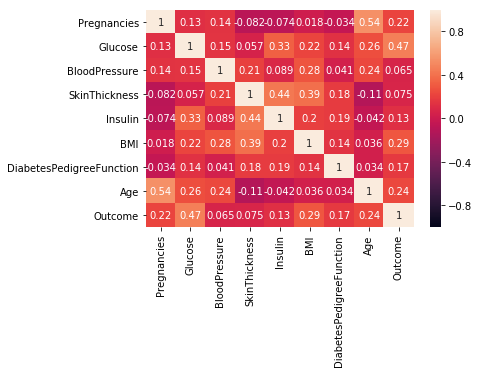

In [16]:
sns.heatmap(df.corr(), vmin=-1, vmax=1.0, annot=True)

---------------------

7-Skew of Univariate Distributions

The skew result can show us a positive(right) or negative (left) skew. Values closer to zero show less skew

In [17]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

It is better to use some data visualization to get a better idea.

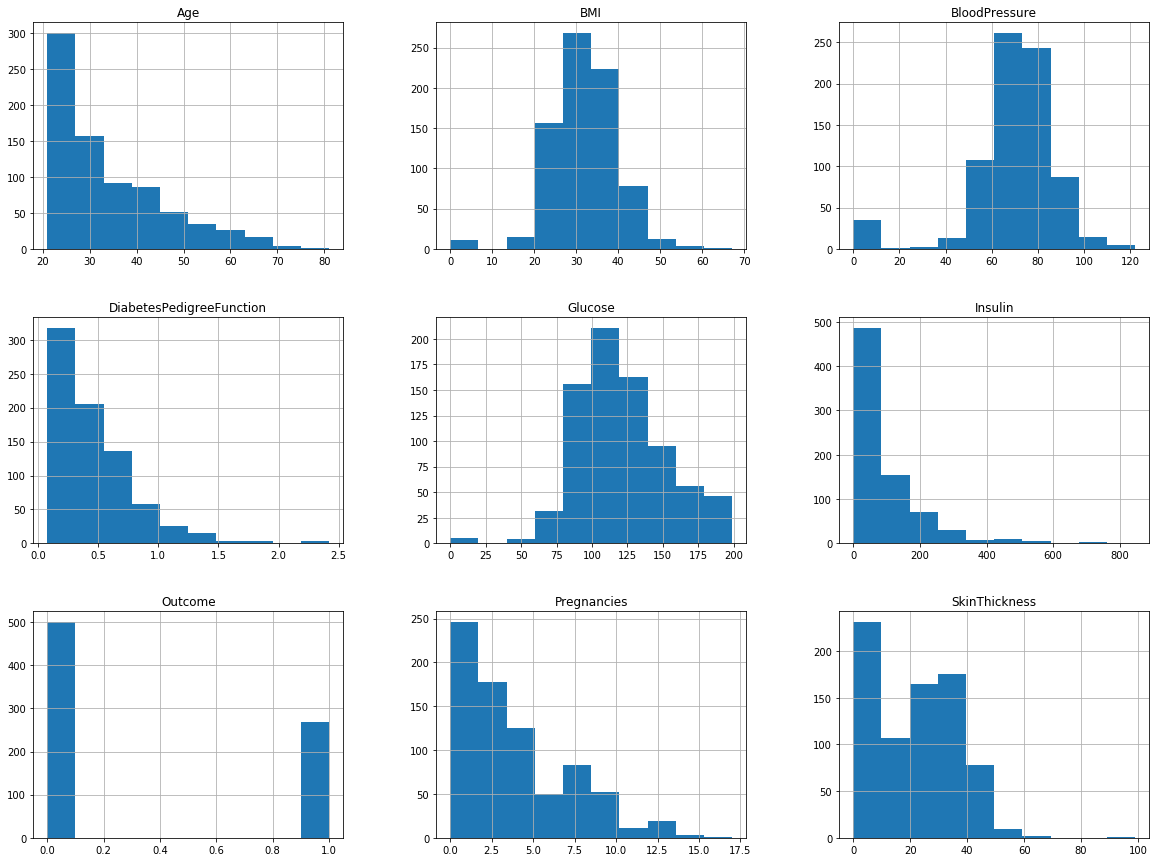

In [18]:
from matplotlib import pyplot as plt
df.hist(bins=10, figsize=(20,15))
plt.show()

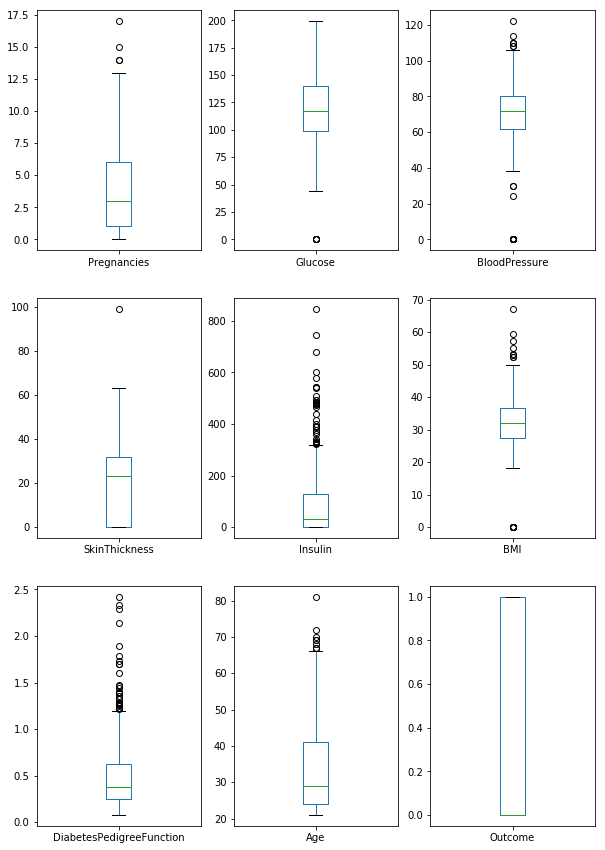

In [19]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,15))
plt.show()

Scatter Plot Matrix

In [20]:
from pandas.tools.plotting import scatter_matrix


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


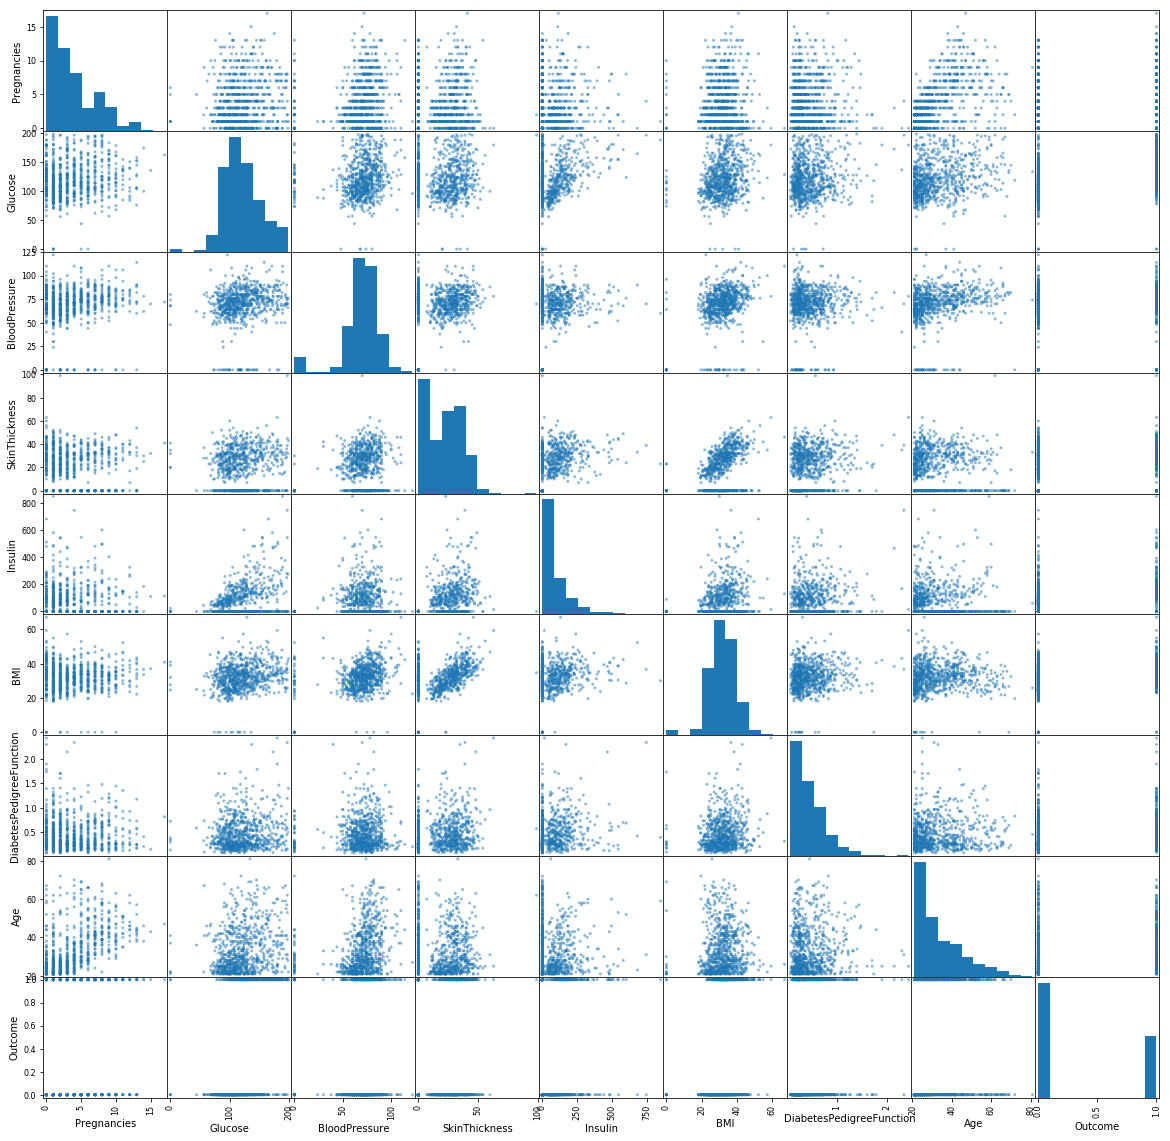

In [21]:

scatter_matrix(df,figsize=(20,20))
plt.show()

---------------------------------------------------------------------------------------------------

Data Cleaning and Preparation for Machine Learning 

1- Evaluation for Missing Data

In [22]:
missing_data= df.isnull()

In [23]:
missing_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [24]:
missing_data.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("--------------------------------")

Pregnancies
False    768
Name: Pregnancies, dtype: int64
--------------------------------
Glucose
False    768
Name: Glucose, dtype: int64
--------------------------------
BloodPressure
False    768
Name: BloodPressure, dtype: int64
--------------------------------
SkinThickness
False    768
Name: SkinThickness, dtype: int64
--------------------------------
Insulin
False    768
Name: Insulin, dtype: int64
--------------------------------
BMI
False    768
Name: BMI, dtype: int64
--------------------------------
DiabetesPedigreeFunction
False    768
Name: DiabetesPedigreeFunction, dtype: int64
--------------------------------
Age
False    768
Name: Age, dtype: int64
--------------------------------
Outcome
False    768
Name: Outcome, dtype: int64
--------------------------------


Lest check how the missing data behave in the data set

In [26]:
#Finding the porcentage of  missing data
round(((missing_data.sum()/len(missing_data))*100), 4)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

Optional - Lets see our outliers in the data set 

In [27]:
# q = df.quantile(0.99)
#df [df > q]

2- Data Cleaning 

Most Machine Learning algorithms cannot work with missing features, so let’s create
a few functions to take care of them. You noticed earlier that the total_bedrooms
attribute has some missing values, so let’s fix this. You have three options:

• Get rid of the corresponding districts.

• Get rid of the whole attribute.

• Set the values to some value (zero, the mean, the median, etc.).

You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna()
methods:

housing.dropna(subset=["total_bedrooms"]) # option 1

housing.drop("total_bedrooms", axis=1) # option 2

median = housing["total_bedrooms"].median()

housing["total_bedrooms"].fillna(median) # option 3

If you choose option 3, you should compute the median value on the training set, and
use it to fill the missing values in the training set, but also don’t forget to save the
median value that you have computed. You will need it later to replace missing values
in the test set when you want to evaluate your system, and also once the system goes
live to replace missing values in new data.

3-Handling Text and Categorical Attributes 

One Hot Encoding 

In [28]:
#Lets check the types 
df.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [29]:
#df = pd.get_dummies(df, prefix_sep='_', drop_first=True)

In [30]:
df.shape

(768, 9)

----------------------------------------------------------------

Feature Selection For Machine Learning 

In [31]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

1-Univariete Selection

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                      Specs        Score
4                   Insulin  2175.565273
1                   Glucose  1411.887041
7                       Age   181.303689
5                       BMI   127.669343
0               Pregnancies   111.519691
3             SkinThickness    53.108040
2             BloodPressure    17.605373
6  DiabetesPedigreeFunction     5.392682


2-Feature Importance

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11188658 0.2257228  0.0969515  0.08011663 0.07942433 0.13717293
 0.11715477 0.15157046]


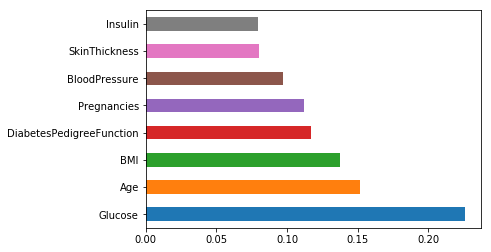

In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

-----------------------------------------

Select the atribites and save the data frame that is ready for use with the machine learning model.

---------------------------------

## Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine
- LinearDiscriminantAnalysis
- AdaBoostClassifier
- GradientBoostingClassifier
ExtraTreesClassifier

Load the test,train data.

In [34]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [35]:
#X_train=
#y_train=
#X_test=

X=df.drop(['Outcome'], axis=1).values
y=df['Outcome'].values


In [36]:
#from sklearn import preprocessing
#X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)


In [38]:
#X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))

In [39]:

#X_train.shape, y_train.shape, X_test.shape

In [40]:
#Load Libraries
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor
from sklearn import preprocessing
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

In [41]:
#Linear Regression 
kfold = KFold(n_splits=10, random_state=42,)
lin_reg= LinearRegression()
results_linreg= cross_val_score(lin_reg, X, y, cv=kfold)
print('Estimate accuracy',results_linreg.mean())

Estimate accuracy 0.2580299922161075


In [42]:

# Logistic Regression
kfold = KFold(n_splits=10, random_state=42)
logreg = LogisticRegression(solver='lbfgs',max_iter=10000)
results_logreg = cross_val_score(logreg, X, y, cv=kfold,scoring='accuracy')
print('Estimate accuracy',results_logreg.mean())

Estimate accuracy 0.7760423786739576


In [43]:
# Support Vector Machines
kfold = KFold(n_splits=10, random_state=42)
svc = SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False)
results_svc = cross_val_score(svc, X, y, cv=kfold,scoring='accuracy')
print('Estimate accuracy',results_svc.mean())

Estimate accuracy 0.7643198906356801


In [44]:
kfold = KFold(n_splits=10, random_state=42)
knn = KNeighborsClassifier(n_neighbors = 3)
results_knn = cross_val_score(knn, X, y, cv=kfold)
print('Estimate accuracy',results_knn.mean())

Estimate accuracy 0.7056049213943951


In [45]:
# Gaussian Naive Bayes
kfold = KFold(n_splits=10, random_state=42)
gaussian = GaussianNB()
results_gaussian = cross_val_score(gaussian, X, y, cv=kfold)
print('Estimate accuracy',results_gaussian.mean())

Estimate accuracy 0.7551777170198223


In [46]:
# Perceptron
kfold = KFold(n_splits=10, random_state=42)
perceptron = Perceptron(max_iter=1000,tol=1e-3)
results_perceptron = cross_val_score(perceptron, X, y, cv=kfold,scoring='accuracy')
print('Estimate accuracy',results_perceptron.mean())

Estimate accuracy 0.5375427204374573


In [47]:
# Linear SVC
kfold = KFold(n_splits=10, random_state=42)
linear_svc = LinearSVC(max_iter=1000)
results_linearsvc= cross_val_score(linear_svc, X, y, cv=kfold, scoring='accuracy')
print('Estimate accuracy',results_linearsvc.mean())

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Estimate accuracy 0.6273581681476419


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [48]:
# Stochastic Gradient Descent
kfold = KFold(n_splits=10, random_state=42)
sgd = SGDClassifier(max_iter=1000,tol=1e-3)
results_sgd = cross_val_score(sgd, X, y, cv=kfold, scoring='accuracy')
print('Estimate accuracy',results_sgd.mean())

Estimate accuracy 0.5638755980861244


In [49]:
# Decision Tree
kfold = KFold(n_splits=10, random_state=42)
decision_tree = DecisionTreeClassifier()
results_decisiontree = cross_val_score(decision_tree, X, y, cv=kfold,scoring='accuracy')
print('Estimate accuracy',results_decisiontree.mean())

Estimate accuracy 0.6938995215311005


In [50]:
# Random Forest
kfold = KFold(n_splits=10, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100)
results_randomforest = cross_val_score(decision_tree, X, y, cv=kfold,scoring='accuracy')
print('Estimate accuracy',results_randomforest.mean())

Estimate accuracy 0.6873718386876282


In [51]:
#Linear Discriminant Analysis
kfold = KFold(n_splits=10, random_state=42)
clf = LinearDiscriminantAnalysis()
results_clf = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')
print('Estimate accuracy',results_clf.mean())

Estimate accuracy 0.773462064251538


In [52]:
# Ada Boost Classifier
kfold = KFold(n_splits=10, random_state=42)
AB = AdaBoostClassifier()
results_AB = cross_val_score(AB, X, y, cv=kfold, scoring='accuracy')
print('Estimate accuracy',results_AB.mean())

#AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)


Estimate accuracy 0.7539473684210527


In [53]:
# Gradient Boosting Classifier
kfold = KFold(n_splits=10, random_state=42)
GBC = GradientBoostingClassifier()
results_GBC = cross_val_score(GBC, X, y, cv=kfold, scoring='accuracy')
print('Estimate accuracy',results_GBC.mean())
#GradientBoostingClassifier(loss=’deviance’, learning_rate=0.1, n_estimators=100, subsample=1.0, criterion=’friedman_mse’, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort=’auto’, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)

Estimate accuracy 0.7642857142857143


In [54]:
#ExtraTreesClassifier
kfold = KFold(n_splits=10, random_state=42)
ETC=ExtraTreesClassifier(n_estimators=100)
results_ETC = cross_val_score(ETC, X, y, cv=kfold, scoring='accuracy')
print('Estimate accuracy',results_ETC.mean())
#ExtraTreesClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)

Estimate accuracy 0.7564764183185237


In [55]:
#XGBClassifier(objective
xgbs = XGBClassifier(objective="binary:logistic", random_state=42)
results_xgbs = cross_val_score(xgbs, X, y, cv=kfold, scoring='accuracy')
print('Estimate accuracy',results_xgbs.mean())

Estimate accuracy 0.7668660287081339


### Model evaluation



In [56]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','Linear Discriminant Analysis','Ada Boost Classifier','Gradient Boosting Classifier','Extra TreesClassifier','XGB Classifier'],
    'Score': [results_linreg.mean(),results_logreg.mean(),results_svc.mean(),results_knn.mean(),results_gaussian.mean(),results_perceptron.mean(),results_linearsvc.mean(),results_sgd.mean(),results_decisiontree.mean(),results_randomforest.mean(),results_clf.mean(),results_AB.mean(),results_GBC.mean(),results_ETC.mean(),results_xgbs.mean()]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Support Vector Machines,0.776042
10,Linear Discriminant Analysis,0.773462
14,XGB Classifier,0.766866
2,KNN,0.764320
12,Gradient Boosting Classifier,0.764286
13,Extra TreesClassifier,0.756476
4,Random Forest,0.755178
11,Ada Boost Classifier,0.753947
3,Logistic Regression,0.705605
8,Linear SVC,0.693900


In [57]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_score_, grid_search.best_params_ ,grid_search.best_estimator_

In [58]:
svc_param_selection(X, y, 20)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(0.7200520833333334,
 {'C': 1, 'gamma': 0.001},
 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False))

In [59]:
def svc_param_selection2(X,y,nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    param_dist = {'C': Cs, 'gamma' : gammas, 'kernel': kernels}
    rand = RandomizedSearchCV(SVC(), param_dist, cv=nfolds, scoring='accuracy', n_iter=10, random_state=42)
    rand.fit(X,y)
    rand.best_score_
    rand.best_params_
    rand.best_estimator_
    return  rand.best_score_, rand.best_params_ ,rand.best_estimator_

In [60]:
svc_param_selection2(X,y,20)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(0.7630208333333334,
 {'kernel': 'linear', 'gamma': 1, 'C': 0.01},
 SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False))